# Session 3
## Python Libraries

# About Libraries
Libraries are collections of resources that can be used. They are like toolboxes we can pick the tools from we need. Python has a lare number of tools build-in, some of which we have already worked with. This is called the [*Python Standard Library*](https://docs.python.org/3/library/).

But things get really interesting is with all the other libraries around. Python is open-source, so the amount of libraries is endless. Many of the most popular libraries are already installed with Anaconda (which is one of the reasons to choose it). But there are many more available.

It is impossible to cover all libraries in sich a chort workshop. So in this session we'll focus on the most important onse that come with Anaconda. These are 
- **Pandas** along with **SciPy** and **NumPy** for data analysis and scientific programming, and 
- **matplotlib** for visualisation and **BeautifulSoup** for webscraping  

But what this session will also do is giving resources and showing how to work with libraries. So ideally you'll be able to work with and explore more libraries yourself.

# Working with Libraries
In Python libraries are technically *modules*. These need to be [imported](https://docs.python.org/3/tutorial/modules.html) to be used. simply write

`import <module>`

Modules are essentially a collection of scripts that contain functions. Often parts of modules can be called separately. For this type

`from <module> import <part>`

# Data Analysis in Python
The main data structure in Python are **arrays**, which are essentially lists. They can be mutable or immutable. Since everything in Python is an object (even functions), arrays also support different datatypes, which is very powerful (but slow)!

The **NumPy** library allows working with multi-dimensional arrays. NumPy is written in low-level language (C and Fortran) for high-level mathematical functions. Having multi-dimensional arrays is very powerful (see matlab) as it allows avoiding slow loops, but NumPy arrays are homogeneous (i.e. of the same datatype), which makes them less flexible. Therefore Numpy is mainly used for mathematical operations, together with **SciPy**, which gives more maths-functionality.  

**Pandas** is built on top of NumPy and has 2-dimensional arrays, called *dataframes*, as main datastructure. It supports heterogeneous datatypes and can be nested, which makes it powerful for data analysis. 

# Pandas: DataFrames

There are two data structures in Pandas
- `Series` are one dimensional, homogeneous arrays
- `DataFrames` are two-dimensional arrays with heterogeneous columns

DataFrames can be constructed from collections such as lists or dictionaries and from existing records, such as `ndarray`.

# Constructing DataFrames
To construct DataFrames use `<my_df> = pd.DataFrame()`

In [23]:
# Example:  
import pandas as pd  
  
# lists
wds = ["these", "are", "some", "words"] 
owds = ["words", "have", "datatype", "string"] 
nbs = [1, 2, 3, 4] 
  
# dictionary of lists  
dict = {'words': wds, 'other words': owds, 'numbers': nbs}  
    
df = pd.DataFrame(dict) 

df


,words,other words,numbers
0,these,words,1
1,are,have,2
2,some,datatype,3
3,words,string,4


# Importing Data
Pandas can import many file formats. The most important ones are excel spreasheets (`.csv`and`.xls`files). To import a csv file use `read_csv()` 

In [181]:
import pandas as pd
data = pd.read_csv('data.csv', parse_dates = ['col1'])
data

,date,col1,col2
0,01/01/20,1,a
1,02/01/20,2,b
2,03/01/20,3,c
3,04/01/20,4,d


# Indexing with Pandas
Having imported data, we might want to work with only a subset of it. We can use *slicing* and *indexing* to call those subsets. `iloc` provides a useful tool for this.

In [81]:
data.iloc[0:1,0:2]

,date,col1
0,01/01/20,1


# Adding and Deleting Data
We can add columns with `data.insert()`, rows with `data.loc()` and delete data with `data.drop()`.

In [183]:
# Example (don't execute everything at the same time)
data = data.drop(columns="newcol") ##drop column
data.insert(3, "newcol", [5, 6, 7, 8], False) ##add newcol
data = data.loc[4] = ['03/01/20', 9, 'e', 10] ##add row 4
data = data.drop(4) ##drop row 4

data


,date,col1,col2,newcol
0,01/01/20,1,a,5
1,02/01/20,2,b,6
2,03/01/20,3,c,7
3,04/01/20,4,d,8


# Export Data
Export data as .csv file, simply use `pd.<dataframe>.to_csv(<filepath>)`. More options are available in the documentation and files can be exported in different formats.


In [203]:
#Example: Exporting dataframe 'data2' as csv
data.to_csv('/Users/paulwohlfarth/Desktop/external/SPE/Session3/data2.csv', sep= ',')

# Concatenating Data

Concatenation is simply adding data. In the following example we concatenate along the index axis (i.e. we add rows). For this we have three steps
- we create the dataframes, and index rows uniquely,
- we then create a list of the three dataframes,
- we concatenate the dataframes using `pd.concat()`

In [187]:
 df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'C': ['C0', 'C1', 'C2', 'C3'],
                     'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])


In [188]:
 df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                     'B': ['B4', 'B5', 'B6', 'B7'],
                     'C': ['C4', 'C5', 'C6', 'C7'],
                     'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])

In [190]:
 df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                     'B': ['B8', 'B9', 'B10', 'B11'],
                     'C': ['C8', 'C9', 'C10', 'C11'],
                     'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])

In [191]:
 frames = [df1, df2, df3]

 result = pd.concat(frames)

In [192]:
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


# Merging Data
Merging is very similar to concatenating. The difference is that DataFrames are joined based on keys and not that data is simply added.

We will only deal with the simplest merge function, that joins two dataframes based one unique key, which is needed to uniquely identify rows or columns. The key can be either columns or indexes. There are generally four ways to merge:

- left (based on the first dataframe)
- right (based on the second dataframe)
- inner (default; intersection if dataframes)
- outer (union of dataframes)

Pandas also allow for more complex merging operations on multiple keys. This involves knowledge of relational algebra, which is beyond the scope of this workshop. More information on data merging with pandas is available [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).



In [238]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'A': ['A0', 'A1', 'A2', 'A3'],
                      'B': ['B0', 'B1', 'B2', 'B3']})
 
left


,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [239]:
 right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
    
 right   
 

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [241]:
#Example result:
result = pd.merge(left, right, on='key', indicator=True)
result

,key,A,B,C,D,_merge
0,K0,A0,B0,C0,D0,both
1,K1,A1,B1,C1,D1,both
2,K2,A2,B2,C2,D2,both
3,K3,A3,B3,C3,D3,both


# Plotting Data
The main library for data visualisation in Python is **matplotlib**. It is the basis for most plots but many more specialised libraries exist for e.g. animated plots etc. 

To plot data with matplotlib we use the `plot()` function. There are essentially three blocks of code that are used to design plots:
1. **Data:** This defines the data to be plotted and creates the actual plot object
2. **Formatting:** This allows adding titles, diesplayed text, and labels
3. **Output:** This calls the plot to be displayed. We can add a line to save the plot to a local folder as well.

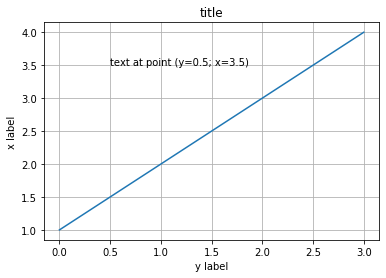

In [25]:
# Example: Basic plot
import matplotlib.pyplot as plt

# Data
data = [1, 2, 3, 4] ## define data to be plotted
plt.plot(data) ## create the plot

#Formatting
plt.title('title') ## plot title
plt.ylabel('x label') ## label y-axis
plt.xlabel('y label') ## label x-axis
plt.text(0.5, 3.5, 'text at point (y=0.5; x=3.5)') ## adding text
plt.grid() ## adding grid lines

# Output
plt.show() ## show the plot

# Formatting Styles
There are formatting options for line styles, markers and colours, that can be combined using the format string (third argument). A complete list of options is available [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) on the bottom of the page.


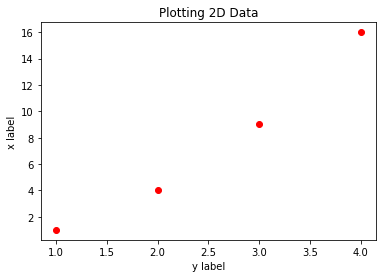

In [51]:
# Example: Basic plot
import matplotlib.pyplot as plt

# Data
xdata = [1, 2, 3, 4] 
ydata = [1, 4, 9, 16]
# plt.plot(xdata, ydata) 
plt.plot(xdata, ydata, 'ro') ## try: 'b', 'r', '--g','^k:'

#Formatting
plt.title('Plotting 2D Data') 
plt.ylabel('x label') 
plt.xlabel('y label') 

# Output
plt.show() 

# Plotting Multiple Objects
We can plot multiple objects (lists, functions,...) by simply adding them (including format string) to `plot()`.

`arrange()`allows adjusting origin on the x-axis, scale on the y-axis, and spacing between markers.


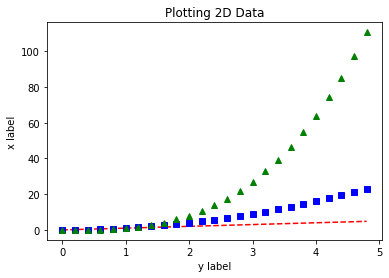

In [68]:
import matplotlib.pyplot as plt

t = np.arange(0., 5., 0.2) ## adjust positioning and spacing 
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^') ## plotting each series, followed by the format string

plt.title('Plotting 2D Data') 
plt.ylabel('x label') 
plt.xlabel('y label') 

plt.show() 

# Plotting with Keyword Strings
In some cases (e.g. scatter plots) there are more plotting options, that can be accessed with **keyword strings**. In the following example we use scatter plots. 

The syntax is
`plot.scatter(var1, var2, c='colorstring', s='shapestring', options)` 

- `var1, var2` data to be correlated
- `c` string value defining colouring 
- `s` string value defining shape

The option `data=data` allows for keyword argments, defined in the first code block. And `np.random.randint` and `np.random.randn` are random samples drawn from unifrom and normal distributions.

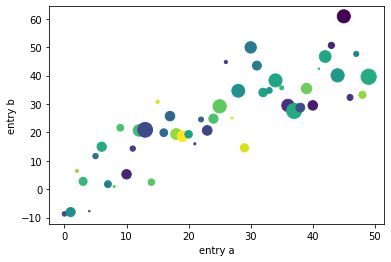

In [137]:
#Example:
data = {'a': np.arange(50), ## creates 50 evenly spaced values
        'c': np.random.randint(0, 50, 50), ## assigning colours
        'd': np.random.randn(50)} ## assigning marker sizes
data['b'] = data['a'] + 10 * np.random.randn(50) ## defines second variable to correlate with
data['d'] = np.abs(data['d']) * 100 ## positioning 

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')

plt.show()

# Categorical Plots
Data can be categorised into groups that can then be plotted. In the following example I've plotted three groups in three ways, creating three subplots:

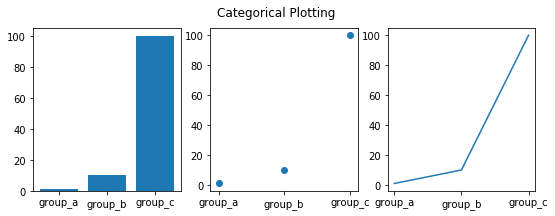

In [140]:
#Example:
names = ['group_a', 'group_b', 'group_c'] ##names of data categories to be plotted
values = [1, 10, 100] # their values

plt.figure(figsize=(9, 3)) ## defining a figure object to plot subplots in
plt.subplot(131) ##first subplot
plt.bar(names, values) ## specify the plotting function
plt.subplot(132)## second subplot
plt.scatter(names, values)
plt.subplot(133)## third subplot
plt.plot(names, values)
plt.suptitle('Categorical Plotting')

plt.show() 

# More Visualisation
There are countless ways to do data visualisation in Python using matplotlib and other libraries. These are just the very basics. 

I've collected some examples of more ideas, including
- 3D plots 
- animated plots

I'm only showing the examples as this is much more than we can introduce in this short workshop. BUT: We are planning on organising a follow-on workshop on data-visualisation. Let us know, should you be interested!


# 3D Plots

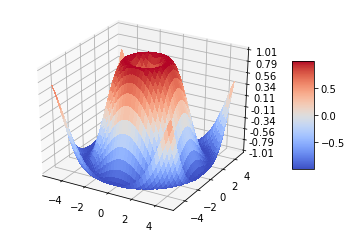

In [185]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()




# Animations with plotly express

In [176]:
import plotly_express as px
px.scatter(px.data.gapminder(), x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="country", hover_name="country", 
           log_x = True, 
           size_max=45, range_x=[100,100000], range_y=[25,90])

# Networks

 ![newplot](files/iCloudDrive/Desktop/external/SPE/Session3/newplot.png)
 


In [189]:

import plotly.graph_objects as go

import networkx as nx

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()

# and much more ...

# More Libraries
A vast amount of other libraries are available, that we will not have time to cover in this workshop. Here are some useful ones
- [**Beautiful Soup**](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for web scraping
- [**statsmodels**](https://www.statsmodels.org/stable/index.html) for econometrics
- [**pyfinance**](https://pypi.org/project/pyfinance/) for finance
- [**pyfolio**](https://github.com/quantopian/pyfolio) for portfolio analysis

APIs
- [**GoogleFinance**](https://pypi.org/project/googlefinance/)/ [**YahooFinance**](https://pypi.org/project/yahoo-finance/) for financial data
- [**fred**](https://pypi.org/project/fred/) wrapper for the FRED database (St Louis Fed)
- [**Tweepy**](https://www.tweepy.org/) for Twitter
- [**PyTrends**](https://pypi.org/project/pytrends/) for GoogleTrends and the [**Officieal Google API**](https://pypi.org/project/pytrends/) 


